# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 1 - Intro Machine Learning**
---

In [1]:
# Tratamiento de los datos 
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de nulos
# ====================
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.  

>Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.  

**Objetivos**  

Los objetivos de hoy son:  

1. Buscar un conjunto de datos a analizar:  
    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:  
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.   
    - Realizar un EDA sencillo para la variable dependiente y las variables independientes. 

### 1. Elección y apertura del dataset

In [2]:
# abrimos el csv seleccionado y reseteamos el índice para evitar problemas futuros
df = pd.read_csv("datos/soci_econ_country_profiles.csv", index_col = 0).reset_index(drop=True)
df.head(2)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

### 2. Selección de la variable respuesta y las columnas pertinentes para su estudio

In [3]:
print(f'Comprobamos que el índice se ha reseteado correctamente y es numérico continuo:\n{df.index}')
df.index
print(f'Este dataset tan solo tiene {df.shape[0]} filas pero tiene muchas columnas, en concreto {df.shape[1]}.')

Comprobamos que el índice se ha reseteado correctamente y es numérico continuo:
RangeIndex(start=0, stop=66, step=1)
Este dataset tan solo tiene 66 filas pero tiene muchas columnas, en concreto 95.


Seleccionamos nuestra variable respuesta: **`Restaurant Price Index`**.  

Una vez hecho esto seleccionamos las columnas que consideramos que nos pueden resultar útiles ya que el dataset es demasiado extenso (95 columnas) para ser manejable al completo para el desarrollo de los ejercicios. En un primer momento nos quedamos con todas las columnas que por sentido común pensamos que podrían estar relacionadas con nuestra variable respuesta. Más adelante veremos si se puede eliminar alguna más

In [4]:
# seleccionamos las columnas que consideramos pertinentes.
df_country = df.filter(spv.lista_columnas, axis=1)

### 3. Renombrado de columnas

In [5]:
# hacemos un primer renombrado para sustituir espacios y quitar mayúsculas
nuevas_columnas = {col: col.replace(" ", "_").lower() for col in df_country.columns}
df_country.rename(columns = nuevas_columnas, inplace = True)

In [6]:
# sacamos los nombres de las columnas para agilizar el siguiente renombrado
df_country.columns

Index(['country', 'region', 'population_in_thousands_(2017)',
       'gdp_per_capita_(current_us$)',
       'employment:_agriculture_(%_of_employed)',
       'employment:_industry_(%_of_employed)',
       'employment:_services_(%_of_employed)',
       'population_age_distribution_(0-14_/_60+_years,_%)',
       'international_migrant_stock_(000/%_of_total_pop.)',
       'education:_government_expenditure_(%_of_gdp)', 'quality_of_life_index',
       'purchasing_power_index', 'safety_index', 'cost_of_living',
       'rent_index', 'grocery_index', 'restaurant_price_index',
       'adjusted_net_national_income_per_capita_(constant_2010_us$)',
       'consumer_price_index_(2010_=_100)',
       'human_capital_index_(hci)_(scale_0-1)',
       'inflation,_consumer_prices_(annual_%)',
       'urban_population_(%_of_total_population)_y'],
      dtype='object')

In [7]:
# renombramos las columnas con nombres más sencillos para que no nos den problemas después y facilitar la lectura y análisis
df_country.rename(columns = spv.renombrado_columnas, inplace = True)
df_country.sample()

,country,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,population_age_distribution_0_14_and_60_plus,international_migrant_stock_000_and_percentage,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population
15,Czechia,EasternEurope,10618,17561.7,2.5,37.0,60.5,15.4/25.6,405.1/3.8,4.1,165.41,76.22,69.82,41.22,14.83,35.84,27.99,16801.716469,110.867228,0.782,2.450534,73.675


### 4. Primer análisis exploratorio

In [8]:
# realizamos una exploración inicial utilizando la siguiente función:
spf.explorar_df(df_country, 'Socio-Economic Country Profile')

EXPLORACIÓN DEL DATAFRAME SOCIO-ECONOMIC COUNTRY PROFILE
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,population_age_distribution_0_14_and_60_plus,international_migrant_stock_000_and_percentage,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population
0,Argentina,SouthAmerica,44271,14564.5,2.0,24.8,73.1,24.9/15.4,2086.3/4.8,5.3,139.59,58.40,37.37,52.57,13.92,44.06,50.37,9094.367252,112.887108,0.611,NaN,91.749
1,Australia,Oceania,24451,51352.2,2.7,21.2,76.1,19.0/21.0,6763.7/28.2,5.2,176.54,101.94,57.58,80.66,42.54,76.87,77.12,43073.967170,115.686785,0.803,1.948647,85.904
2,Austria,WesternEurope,8736,44117.7,4.7,25.6,69.7,14.1/25.1,1492.4/17.5,5.5,190.37,95.66,80.75,71.52,25.86,65.86,66.94,39557.667995,113.999737,0.793,2.081269,58.094
3,Belarus,EasternEurope,9468,5750.8,9.6,32.0,58.4,16.7/21.3,1082.9/11.4,4.9,119.23,36.43,77.74,33.84,12.21,27.19,37.60,5923.223118,NaN,NaN,6.031837,78.134
4,Belgium,WesternEurope,11429,40277.8,1.2,21.2,77.6,17.1/24.6,1387.9/12.3,6.6,160.52,91.02,55.49,75.36,29.64,65.77,82.34,38493.272444,113.128903,0.757,2.125971,97.961


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,population_age_distribution_0_14_and_60_plus,international_migrant_stock_000_and_percentage,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population
61,United Arab Emirates,WesternAsia,9400,40438.8,3.5,21.1,75.4,13.9/2.4,8095.1/88.4,-99,139.27,116.77,79.34,67.98,68.84,55.36,63.92,37929.274360,113.302921,0.659,1.966826,86.248
62,United Kingdom,NorthernEurope,66182,44162.4,1.2,18.4,80.4,17.7/23.9,8543.1/13.2,5.7,172.87,96.85,58.81,69.49,30.98,55.85,76.84,36564.264451,114.943592,0.781,2.557756,83.143
63,United States of America,NorthernAmerica,324460,56053.8,1.5,17.2,81.3,18.9/21.5,46627.1/14.5,5.4,179.73,123.17,51.24,75.42,40.30,75.57,70.02,46371.354832,112.411557,0.762,2.130110,82.058
64,Venezuela (Bolivarian Republic of),SouthAmerica,31977,11068.9,11.9,26.8,61.3,27.6/9.9,1404.4/4.5,...,0.00,3.35,14.72,38.30,7.51,39.40,37.34,NaN,NaN,NaN,NaN,88.183
65,Vietnam,South-easternAsia,95541,2067.9,41.8,22.9,35.2,23.1/11.1,72.8/0.1,5.7,36.12,24.77,47.04,40.11,15.49,39.60,20.46,1613.264805,153.631652,0.666,3.520257,35.213


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Socio-Economic Country Profile:


,country,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,population_age_distribution_0_14_and_60_plus,international_migrant_stock_000_and_percentage,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population
46,Russian Federation,EasternEurope,143990,9243.3,6.8,27.1,66.1,17.6/21.1,11643.3/8.1,3.9,85.93,48.27,53.95,42.01,17.58,33.58,43.85,8827.816298,168.175239,0.729,3.683329,74.292
17,Egypt,NorthernAfrica,97553,3452.3,25.4,25.3,49.3,33.5/7.9,491.6/0.5,...,91.81,29.39,47.14,22.36,5.03,19.01,18.56,2524.475991,231.094115,0.486,29.506608,42.705
8,Canada,NorthernAmerica,36624,43205.6,2.1,19.5,78.4,16.0/23.5,7835.5/21.8,5.3,167.18,108.01,60.75,70.16,29.84,69.26,65.65,41350.069927,111.984831,0.799,1.596884,81.350
1,Australia,Oceania,24451,51352.2,2.7,21.2,76.1,19.0/21.0,6763.7/28.2,5.2,176.54,101.94,57.58,80.66,42.54,76.87,77.12,43073.967170,115.686785,0.803,1.948647,85.904
61,United Arab Emirates,WesternAsia,9400,40438.8,3.5,21.1,75.4,13.9/2.4,8095.1/88.4,-99,139.27,116.77,79.34,67.98,68.84,55.36,63.92,37929.274360,113.302921,0.659,1.966826,86.248
54,Sri Lanka,SouthernAsia,20877,3973.7,27.4,25.9,46.6,24.0/14.9,38.7/0.2,2.2,88.99,30.28,65.43,33.47,8.74,36.79,19.51,3666.867163,147.087858,0.584,7.704138,18.384
55,Sweden,NorthernEurope,9911,50687.5,1.8,18.2,79.9,17.5/25.5,1639.8/16.8,7.7,172.74,107.23,53.35,75.88,26.86,67.94,78.27,48316.276758,106.491775,0.800,1.794499,87.146
26,Iran (Islamic Republic of),SouthernAsia,81163,5038.1,16.6,32.5,50.9,23.7/8.8,2726.4/3.4,2.9,97.17,43.18,49.10,38.26,17.05,33.53,33.17,4523.723569,333.673322,0.591,8.044924,74.394
21,Germany,WesternEurope,82114,41686.2,1.4,27.5,71.2,13.1/28.0,12005.7/14.9,5.0,189.74,124.88,67.97,65.50,25.35,50.09,62.62,40038.345181,109.352463,0.795,1.509497,77.261
16,Denmark,NorthernEurope,5734,53149.3,2.4,19.2,78.4,16.5/25.3,572.5/10.1,8.6,184.92,98.76,78.87,83.02,35.02,63.84,101.01,53704.959389,108.633158,0.774,1.147132,87.757


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene 66 filas y 22 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   country                                         66 non-null     object 
 1   region                                          66 non-null     object 
 2   population_2017                                 66 non-null     int64  
 3   gdp_per_capita                                  66 non-null     float64
 4   employment_agriculture                          66 non-null     float64
 5   employment_industry                

,count,mean,std,min,25%,50%,75%,max
population_2017,66.0,86551.363636,238173.608572,1180.000000,7155.000000,18867.000000,65881.500000,1.409517e+06
gdp_per_capita,66.0,23531.648485,20582.322358,1410.400000,6253.775000,15323.500000,40398.550000,8.083110e+04
employment_agriculture,66.0,10.575758,10.981566,0.200000,2.700000,6.000000,14.775000,4.430000e+01
employment_industry,66.0,24.056061,6.194865,14.900000,19.900000,23.850000,27.100000,5.410000e+01
employment_services,66.0,65.356061,12.711462,31.200000,58.675000,67.600000,76.100000,8.490000e+01
quality_of_life_index,66.0,134.090455,42.106991,0.000000,102.685000,141.055000,167.110000,1.903700e+02
purchasing_power_index,66.0,71.386818,29.967676,3.350000,47.707500,70.115000,95.855000,1.380500e+02
safety_index,66.0,60.630455,14.160485,14.720000,52.712500,60.100000,70.770000,8.430000e+01
cost_of_living,66.0,55.273485,20.900261,22.360000,38.375000,49.795000,72.912500,1.220600e+02
rent_index,66.0,22.022273,16.898803,5.030000,10.815000,15.505000,28.220000,8.408000e+01


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
country,66,66,Argentina,1
region,66,14,EasternEurope,9
population_age_distribution_0_14_and_60_plus,66,66,24.9/15.4,1
international_migrant_stock_000_and_percentage,66,66,2086.3/4.8,1
education,66,35,...,6


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene las siguientes columnas: 
Index(['country', 'region', 'population_2017', 'gdp_per_capita',
       'employment_agriculture', 'employment_industry', 'employment_services',
       'population_age_distribution_0_14_and_60_plus',
       'international_migrant_stock_000_and_percentage', 'education',
       'quality_of_life_index', 'purchasing_power_index', 'safety_index',
       'cost_of_living', 'rent_index', 'grocery_index',
       'restaurant_price_index',
       'adjusted_net_national_income_per_capita_2010', 'consumer_price_index',
       'human_capital_index', 'inflation', 'urban_population'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
country: 66
region: 14
Los valores únicos de la columna "region" son: ['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEuro

Vemos que tenemos tan solo 2 valores nulos en 3 columnas (`consumer_price_index`, `human_capital_index` e `inflation`), así como una columna sin nulos (`education`) pero que tiene nulos encubiertos (valor '...').  

No tenemos duplicados.

Sin embargo algunas columnas tienen un tipo de dato que deberíamos corregir. También hay columnas con dos datos diferentes, que deberíamos separar. Si nos fijamos la mayoría de las columnas son numéricas continuas. Tan solo las columnas de `country` y  `regio` son categóricas y en realidad la de `country` funciona más como un índice o valor identificativo ya que hay un solo registro por país.

### 5. Descripción de las columnas

Antes de continuar vamos a revisar los datos que se incluyen en cada columna:
- `country`: País analizado. Hay un registro por país (object)   
- `region`: Región del mundo en la que se encuentra el país (object)   
- `population_2017`: Population in 2017 in thousands (integer)   
- `gdp_per_capita`: Producto interior bruto (GDP) per capita, en US$ actuales (float)   
- `employment_agriculture`: % de población empleada en el sector de la agricultua (float)   
- `employment_industry`: % de población empleada en el sector de la industria (float)   
- `employment_services`: % de población empleada en el sector servicios (float)   
- `population_age_distribution_0_14_and_60_plus`: distribución de la población por edades. Indica el % de población entre 0 y 14 años por un lado y el % de población de más de 60 años por otro  (object)  
- `international_migrant_stock_000_and_percentage`: cantidad de migrantes internacionales en términos absolutos y en % respecto a la población total (object)   
- `education`: % del producto interior bruto (DGP) que gasta el gobierno en educación (object)   
- `quality_of_life_index`: índice de la calidad de vida de la población (float)   
- `purchasing_power_index`: índice del poder adquisitivo de la población (float)   
- `safety_index`: Índice de la seguridad del país (float)   
- `cost_of_living`: Coste de la vida (float)   
- `rent_index`: Índice de alquiler (float)   
- `grocery_index`: Índice del precio de la cesta de la compra (float)   
- `restaurant_price_index`: Índice de los precios de los restaurantes del país (float)   
- `adjusted_net_national_income_per_capita_2010`: Ingreso nacional neto ajustado per cápita, en US$ constantes de 2010 (float)  
- `consumer_price_index`: Índice de precios al consumidor, 2010 = 100 (float)   
- `human_capital_index`: índice de capital humano (HCI) en una escala entre 0 y 1 (float)   
- `inflation`: % de inflación anual de los precios del consumidor (float)   
- `urban_population`: % de la población total que reside en zonas urbanas (float)   

### 6. Cambios necesarios en las columnas 

In [9]:
# metemos la columna 'country' en el índice, ya que funciona como tal
df_country.set_index('country', inplace=True)
df_country.sample()

,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,population_age_distribution_0_14_and_60_plus,international_migrant_stock_000_and_percentage,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population
country,,,,,,,,,,,,,,,,,,,,,
"China, Hong Kong SAR",EasternAsia,7365,42431.0,0.2,14.9,84.9,11.5/23.5,2838.7/38.9,3.3,94.45,81.45,79.32,79.96,84.08,81.88,54.87,NaN,127.768157,0.822,1.480583,100.0


In [10]:
# vemos que la columna 'education' debería ser numérica y es tipo object.
df_country['education'].unique()

array(['5.3', '5.2', '5.5', '4.9', '6.6', '-99', '6.0', '4.1', '3.3',
       '4.5', '4.6', '6.1', '8.6', '...', '7.2', '5.0', '4.7', '3.8',
       '3.6', '2.9', '5.8', '2.6', '6.4', '7.4', '5.1', '3.1', '3.9',
       '4.2', '4.3', '2.2', '7.7', '4.8', '5.9', '5.7', '5.4'],
      dtype=object)

In [11]:
# reemplazamos por np.nan los valores que en realidad serían nulos '...' y '-99' y lo pasamos a tipo float
df_country['education'] = df_country['education'].apply(lambda dato: float(dato) if ('...' not in dato) & ('-99' not in dato) else np.nan)
df_country['education'].unique()

array([5.3, 5.2, 5.5, 4.9, 6.6, nan, 6. , 4.1, 3.3, 4.5, 4.6, 6.1, 8.6,
       7.2, 5. , 4.7, 3.8, 3.6, 2.9, 5.8, 2.6, 6.4, 7.4, 5.1, 3.1, 3.9,
       4.2, 4.3, 2.2, 7.7, 4.8, 5.9, 5.7, 5.4])

In [12]:
# vemos que las columnas 'population_age_distribution_0_14_and_60_plus' y 'international_migrant_stock_000_and_percentage' tienen un doble dato y debemos dividirlas para poder utilizar los datos como numéricos
df_country[['population_age_distribution_0_14','population_age_distribution_60_plus']] = df_country['population_age_distribution_0_14_and_60_plus'].str.split('/', expand=True)
df_country[['international_migrant_stock_000','international_migrant_stock']] = df_country['international_migrant_stock_000_and_percentage'].str.split('/', expand=True)
# una vez desdobladas eliminamos las columnas originales
df_country.drop(columns=['population_age_distribution_0_14_and_60_plus', 'international_migrant_stock_000_and_percentage'], inplace=True)
# convertimos las columnas que hemos creado a tipo float
df_country[spv.lista_float] = df_country[spv.lista_float].astype('float64', copy=True, errors='raise') 
# visualizamos las 5 primeras líneas
df_country.head()

,region,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock_000,international_migrant_stock
country,,,,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,44271,14564.5,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,13.92,44.06,50.37,9094.367252,112.887108,0.611,NaN,91.749,24.9,15.4,2086.3,4.8
Australia,Oceania,24451,51352.2,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,42.54,76.87,77.12,43073.967170,115.686785,0.803,1.948647,85.904,19.0,21.0,6763.7,28.2
Austria,WesternEurope,8736,44117.7,4.7,25.6,69.7,5.5,190.37,95.66,80.75,71.52,25.86,65.86,66.94,39557.667995,113.999737,0.793,2.081269,58.094,14.1,25.1,1492.4,17.5
Belarus,EasternEurope,9468,5750.8,9.6,32.0,58.4,4.9,119.23,36.43,77.74,33.84,12.21,27.19,37.60,5923.223118,NaN,NaN,6.031837,78.134,16.7,21.3,1082.9,11.4
Belgium,WesternEurope,11429,40277.8,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,29.64,65.77,82.34,38493.272444,113.128903,0.757,2.125971,97.961,17.1,24.6,1387.9,12.3


In [13]:
# comprobamos que los tipos de datos son correctos
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Argentina to Vietnam
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   region                                        66 non-null     object 
 1   population_2017                               66 non-null     int64  
 2   gdp_per_capita                                66 non-null     float64
 3   employment_agriculture                        66 non-null     float64
 4   employment_industry                           66 non-null     float64
 5   employment_services                           66 non-null     float64
 6   education                                     56 non-null     float64
 7   quality_of_life_index                         66 non-null     float64
 8   purchasing_power_index                        66 non-null     float64
 9   safety_index                                  66 non-null  

### 7. Primer análisis de la correlación entre variables numéricas. Eliminación de variables redundantes

In [14]:
# separamos las columnas numéricas
df_country_num = df_country.select_dtypes(include=np.number)
df_country_num.sample()

,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock_000,international_migrant_stock
country,,,,,,,,,,,,,,,,,,,,,,
"China, Hong Kong SAR",7365,42431.0,0.2,14.9,84.9,3.3,94.45,81.45,79.32,79.96,84.08,81.88,54.87,NaN,127.768157,0.822,1.480583,100.0,11.5,23.5,2838.7,38.9


In [15]:
# obtenemos la matriz de correlación de Spearman ya que algunas de las relaciones entre las variables no son lineales como veremos más adelante
correl = df_country_num.corr(method='spearman')
correl

,population_2017,gdp_per_capita,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_2010,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock_000,international_migrant_stock
population_2017,1.000000,-0.356936,0.343351,-0.058540,-0.279261,-0.189323,-0.359775,-0.207390,-0.501957,-0.281161,-0.176142,-0.148191,-0.358463,-0.343590,0.487912,-0.307680,0.416392,-0.137377,0.389022,-0.301389,0.421021,-0.507871
gdp_per_capita,-0.356936,1.000000,-0.825057,-0.337839,0.765550,0.396572,0.713182,0.840518,0.466031,0.879971,0.836059,0.805916,0.882318,0.986538,-0.543819,0.794212,-0.589194,0.588838,-0.429630,0.410029,0.302077,0.679632
employment_agriculture,0.343351,-0.825057,1.000000,0.275443,-0.828677,-0.315792,-0.579413,-0.714177,-0.384672,-0.783302,-0.743852,-0.693129,-0.814898,-0.805454,0.435156,-0.649493,0.436576,-0.708130,0.339598,-0.340140,-0.365523,-0.715910
employment_industry,-0.058540,-0.337839,0.275443,1.000000,-0.644879,-0.334748,-0.138167,-0.249611,0.069794,-0.457133,-0.373398,-0.476492,-0.428786,-0.306384,0.103631,-0.217952,0.193708,-0.360683,-0.215993,0.107590,-0.244162,-0.341814
employment_services,-0.279261,0.765550,-0.828677,-0.644879,1.000000,0.472544,0.585389,0.649374,0.237636,0.796342,0.675706,0.705539,0.823010,0.754379,-0.451038,0.639271,-0.393846,0.692741,-0.182060,0.307278,0.350093,0.681874
education,-0.189323,0.396572,-0.315792,-0.334748,0.472544,1.000000,0.535845,0.424865,-0.083373,0.374335,0.272866,0.297794,0.498598,0.450769,-0.267911,0.324823,-0.143572,0.242234,0.125937,0.177573,-0.045774,0.264268
quality_of_life_index,-0.359775,0.713182,-0.579413,-0.138167,0.585389,0.535845,1.000000,0.715771,0.444342,0.600250,0.483337,0.474277,0.685322,0.775321,-0.653846,0.653022,-0.455540,0.217662,-0.413533,0.611025,0.093372,0.463088
purchasing_power_index,-0.207390,0.840518,-0.714177,-0.249611,0.649374,0.424865,0.715771,1.000000,0.446618,0.741572,0.731789,0.686011,0.722563,0.843452,-0.454716,0.630676,-0.548031,0.459644,-0.316930,0.248698,0.404154,0.596309
safety_index,-0.501957,0.466031,-0.384672,0.069794,0.237636,-0.083373,0.444342,0.446618,1.000000,0.358317,0.346840,0.289329,0.311216,0.473861,-0.449730,0.504510,-0.551700,0.136335,-0.637646,0.397904,-0.090200,0.388820
cost_of_living,-0.281161,0.879971,-0.783302,-0.457133,0.796342,0.374335,0.600250,0.741572,0.358317,1.000000,0.876369,0.950099,0.911919,0.868956,-0.524130,0.733198,-0.586172,0.632049,-0.338184,0.356043,0.330801,0.655455


En la matriz de correlaciones se puede ver claramente la dirección de la correlación entre variables, ya que tan solo hay que fijarse en el signo. Sin embargo, para ver mejor tanto la dirección como la fuerza de la relación utilizaremos el heatmap

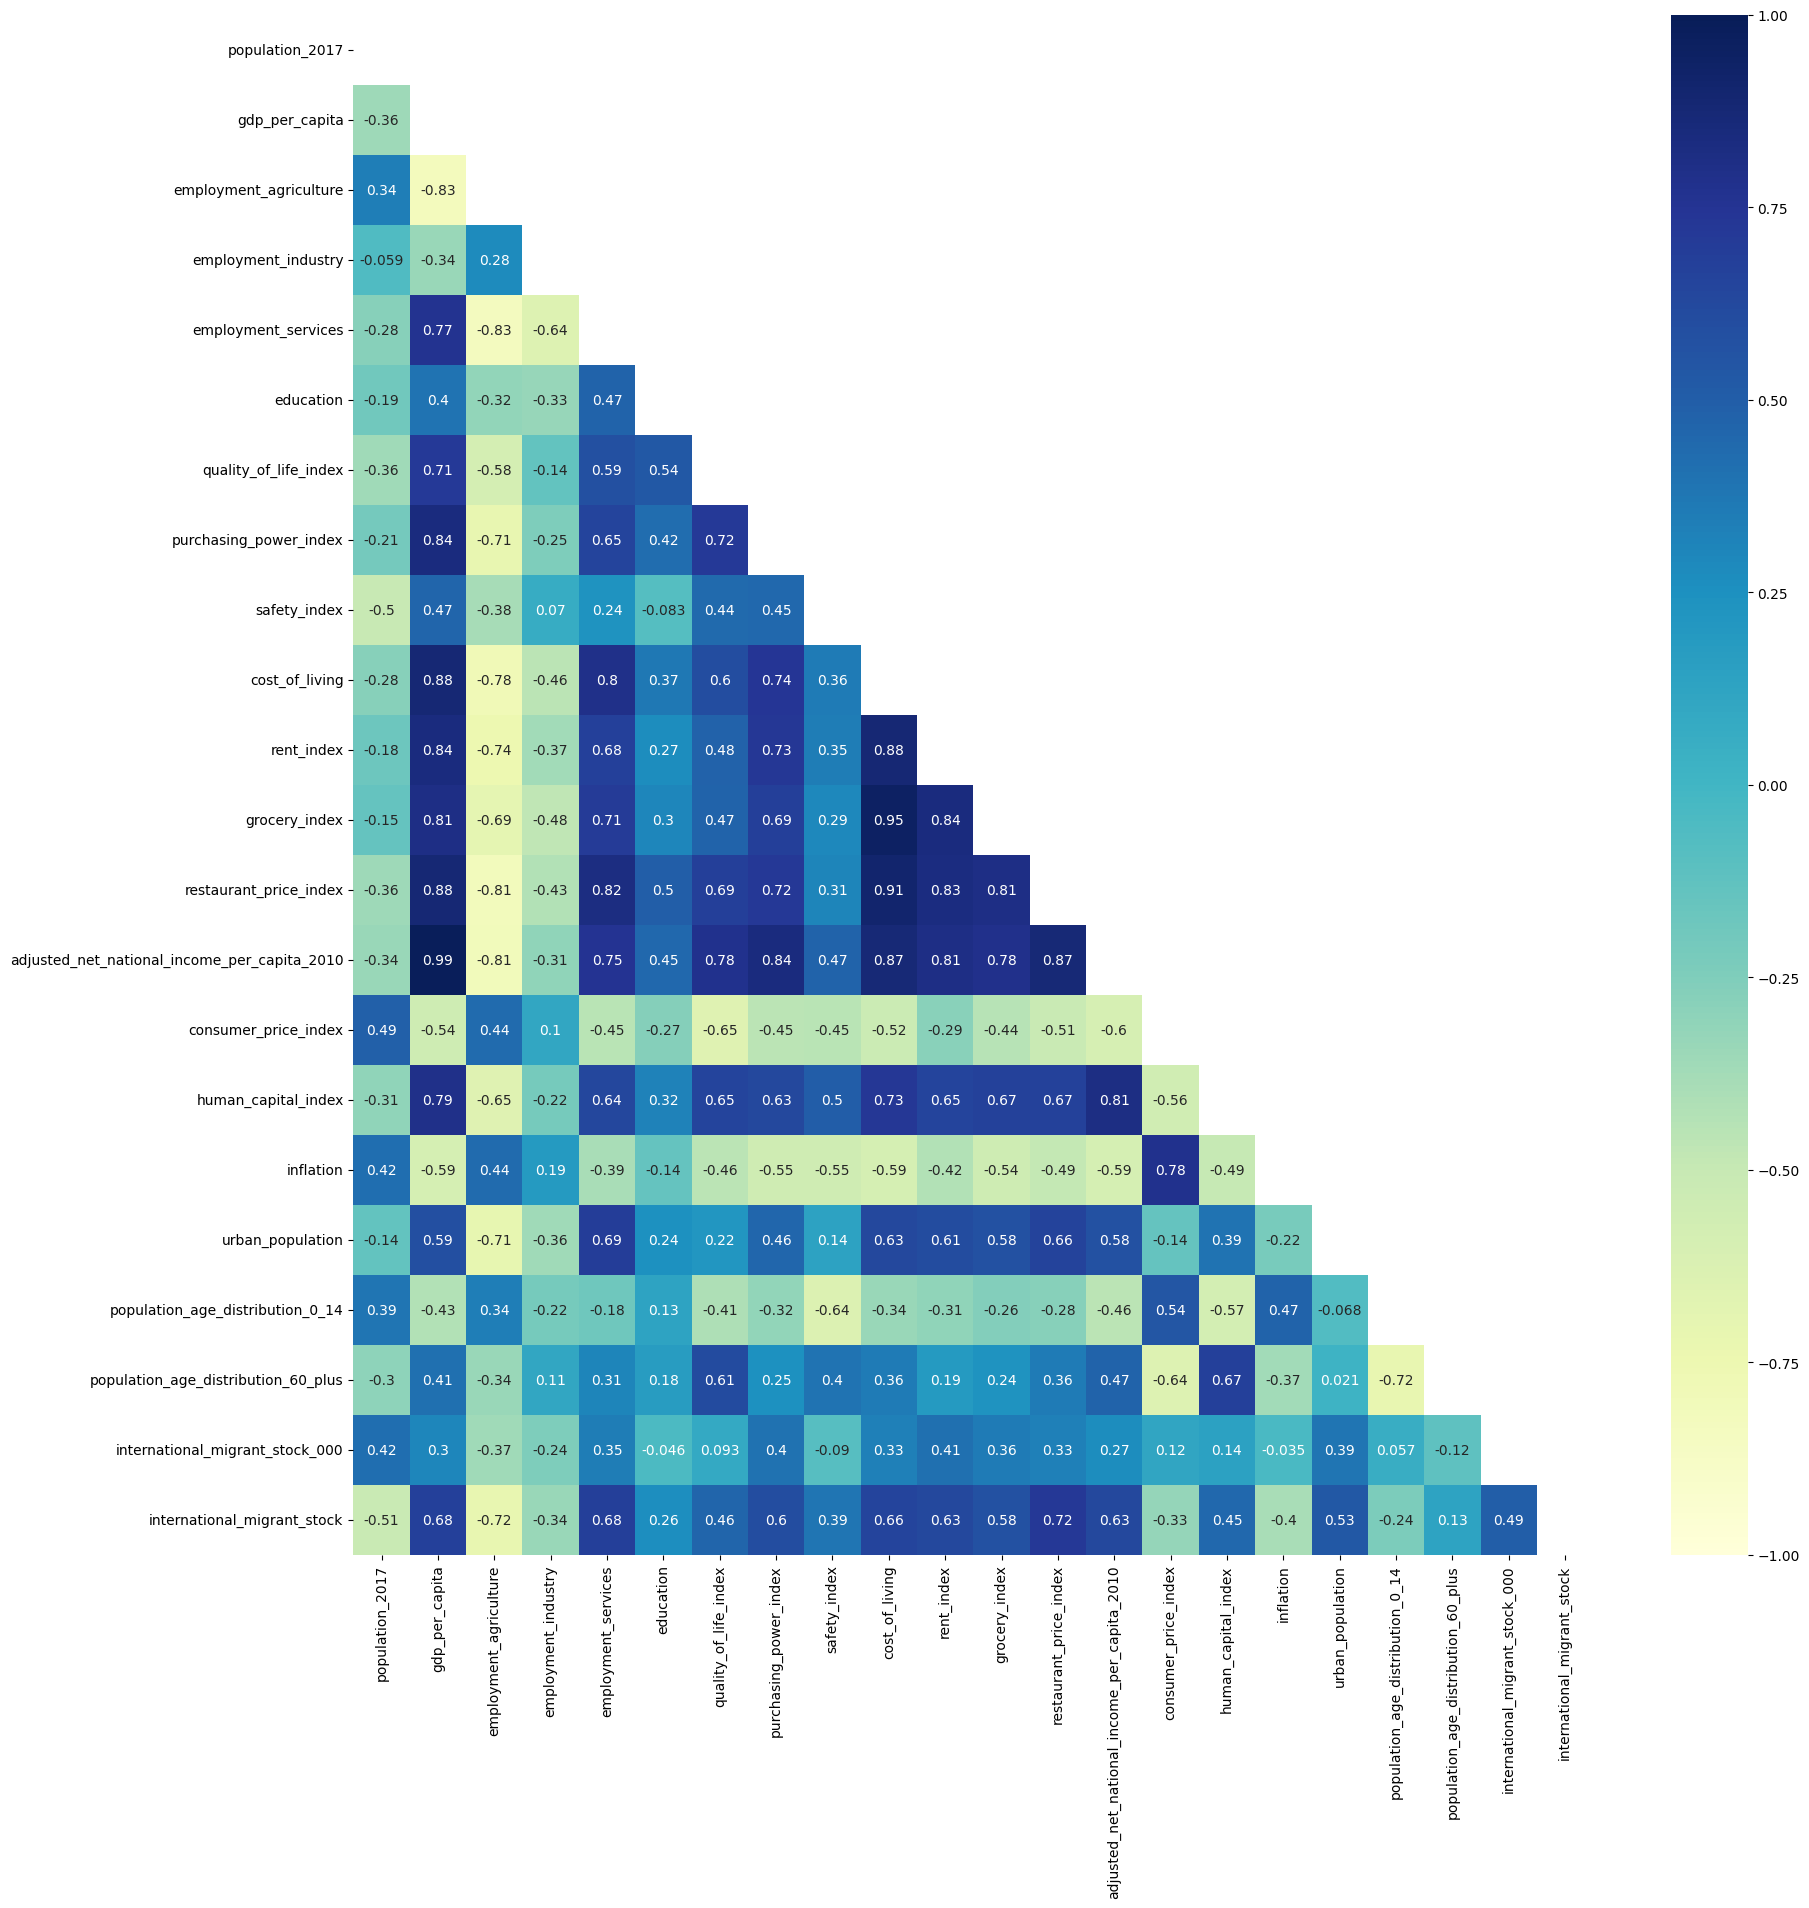

In [16]:
# sacamos el heatmap para visualizarlo mejor
mask = np.triu(np.ones_like(correl, dtype = np.bool_))
sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

En vista de que algunas de las variables tienen una correlación muy alta y para no complicar en exceso el tratamiento y análisis de los datos con variables redundantes (correlación igual o superior a 0,88) procedemos a eliminar algunas columnas. De entre las columnas redundantes eliminamos aquellas que tienen menor correlación con nuestra variable respuesta:  
- Eliminamos 'adjusted_net_national_income_per_capita_2010' (0,87 correlación con variable respuesta) que tiene una correlación de 0,99 con 'gdp_per_capita' (0,88 correlación con variable respuesta) y una correlación de 0,87 con 'cost_of_living' (0,91 correlación con variable respuesta)
- Eliminamos 'gdp_per_capita' (0,88 correlación con variable respuesta) que tiene una correlación de 0,88 con 'cost_of_living' (0,91 correlación con variable respuesta)
- Eliminamos 'grocery_index' (0,81 correlación con variable respuesta) que tiene una correlación de 0,95 con 'cost_of_living' (0,91 correlación con variable respuesta)
- Eliminamos 'rent_index' (0,83 correlación con variable respuesta) que tiene una correlación de 0,88 con 'cost_of_living' (0,91 correlación con variable respuesta)

Eliminamos también la columna 'international_migrant_stock_000' (0,33 correlación con variable respuesta) porque da la  misma información que la de 'international_migrant_stock' (0,72 correlación con variable respuesta) y tiene menos correlación con la variable respuesta.

In [17]:
# eliminamos las columnas indicadas
df_country.drop(columns=['adjusted_net_national_income_per_capita_2010', 'grocery_index', 
                         'gdp_per_capita', 'rent_index', 'international_migrant_stock_000'], inplace=True)
df_country.sample()

,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Vietnam,South-easternAsia,95541,41.8,22.9,35.2,5.7,36.12,24.77,47.04,40.11,20.46,153.631652,0.666,3.520257,35.213,23.1,11.1,0.1


### 8. Exploración y correlación entre las variables numéricas finalmente seleccionadas

In [18]:
spf.explorar_df(df_country, 'Socio-Economic Country Profile')

EXPLORACIÓN DEL DATAFRAME SOCIO-ECONOMIC COUNTRY PROFILE
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Socio-Economic Country Profile son:


,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2
Austria,WesternEurope,8736,4.7,25.6,69.7,5.5,190.37,95.66,80.75,71.52,66.94,113.999737,0.793,2.081269,58.094,14.1,25.1,17.5
Belarus,EasternEurope,9468,9.6,32.0,58.4,4.9,119.23,36.43,77.74,33.84,37.60,NaN,NaN,6.031837,78.134,16.7,21.3,11.4
Belgium,WesternEurope,11429,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,82.34,113.128903,0.757,2.125971,97.961,17.1,24.6,12.3


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Socio-Economic Country Profile son:


,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
United Arab Emirates,WesternAsia,9400,3.5,21.1,75.4,NaN,139.27,116.77,79.34,67.98,63.92,113.302921,0.659,1.966826,86.248,13.9,2.4,88.4
United Kingdom,NorthernEurope,66182,1.2,18.4,80.4,5.7,172.87,96.85,58.81,69.49,76.84,114.943592,0.781,2.557756,83.143,17.7,23.9,13.2
United States of America,NorthernAmerica,324460,1.5,17.2,81.3,5.4,179.73,123.17,51.24,75.42,70.02,112.411557,0.762,2.130110,82.058,18.9,21.5,14.5
Venezuela (Bolivarian Republic of),SouthAmerica,31977,11.9,26.8,61.3,NaN,0.00,3.35,14.72,38.30,37.34,NaN,NaN,NaN,88.183,27.6,9.9,4.5
Vietnam,South-easternAsia,95541,41.8,22.9,35.2,5.7,36.12,24.77,47.04,40.11,20.46,153.631652,0.666,3.520257,35.213,23.1,11.1,0.1


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Socio-Economic Country Profile:


,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Malaysia,South-easternAsia,31624,11.8,27.3,60.9,5.0,51.65,73.34,35.25,40.24,20.87,119.605066,0.622,3.871201,75.447,24.3,9.7,8.3
Belgium,WesternEurope,11429,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,82.34,113.128903,0.757,2.125971,97.961,17.1,24.6,12.3
Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2
Hungary,EasternEurope,9722,4.3,29.8,65.9,4.7,138.82,47.52,61.61,42.77,32.72,114.450017,0.703,2.348243,71.062,14.3,26.0,4.6
Brazil,SouthAmerica,209288,15.2,21.5,63.2,6.0,96.15,42.38,29.38,53.07,42.33,155.668786,0.560,3.446373,86.309,21.7,12.6,0.3
Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
Qatar,WesternAsia,2639,1.2,54.1,44.7,3.6,132.37,111.28,84.30,69.20,72.73,115.858803,0.615,0.394879,99.078,13.9,2.8,75.5
Iran (Islamic Republic of),SouthernAsia,81163,16.6,32.5,50.9,2.9,97.17,43.18,49.10,38.26,33.17,333.673322,0.591,8.044924,74.394,23.7,8.8,3.4
Jordan,WesternAsia,9702,2.0,17.8,80.2,NaN,117.47,42.27,56.86,59.22,56.19,119.329869,0.562,3.323894,90.747,35.5,5.7,41.0


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene 66 filas y 18 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Argentina to Vietnam
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region                               66 non-null     object 
 1   population_2017                      66 non-null     int64  
 2   employment_agriculture               66 non-null     float64
 3   employment_industry                  66 non-null     float64
 4   employment_services                  66 non-null     float64
 5   education                            56 non-null     float64
 6   quality_of_life_index                6

,count,mean,std,min,25%,50%,75%,max
population_2017,66.0,86551.363636,238173.608572,1180.000000,7155.000000,18867.000000,65881.500000,1.409517e+06
employment_agriculture,66.0,10.575758,10.981566,0.200000,2.700000,6.000000,14.775000,4.430000e+01
employment_industry,66.0,24.056061,6.194865,14.900000,19.900000,23.850000,27.100000,5.410000e+01
employment_services,66.0,65.356061,12.711462,31.200000,58.675000,67.600000,76.100000,8.490000e+01
education,56.0,4.907143,1.288531,2.200000,4.100000,5.000000,5.500000,8.600000e+00
quality_of_life_index,66.0,134.090455,42.106991,0.000000,102.685000,141.055000,167.110000,1.903700e+02
purchasing_power_index,66.0,71.386818,29.967676,3.350000,47.707500,70.115000,95.855000,1.380500e+02
safety_index,66.0,60.630455,14.160485,14.720000,52.712500,60.100000,70.770000,8.430000e+01
cost_of_living,66.0,55.273485,20.900261,22.360000,38.375000,49.795000,72.912500,1.220600e+02
restaurant_price_index,66.0,48.807879,24.874263,16.380000,28.382500,43.490000,66.617500,1.198500e+02


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
region,66,14,EasternEurope,9


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene las siguientes columnas: 
Index(['region', 'population_2017', 'employment_agriculture',
       'employment_industry', 'employment_services', 'education',
       'quality_of_life_index', 'purchasing_power_index', 'safety_index',
       'cost_of_living', 'restaurant_price_index', 'consumer_price_index',
       'human_capital_index', 'inflation', 'urban_population',
       'population_age_distribution_0_14',
       'population_age_distribution_60_plus', 'international_migrant_stock'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
region: 14
Los valores únicos de la columna "region" son: ['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEurope' 'SouthernEurope'
 'NorthernAmerica' 'EasternAsia' 'WesternAsia' 'NorthernEurope'
 'NorthernAfrica' 'SouthernAsia' 'South-e

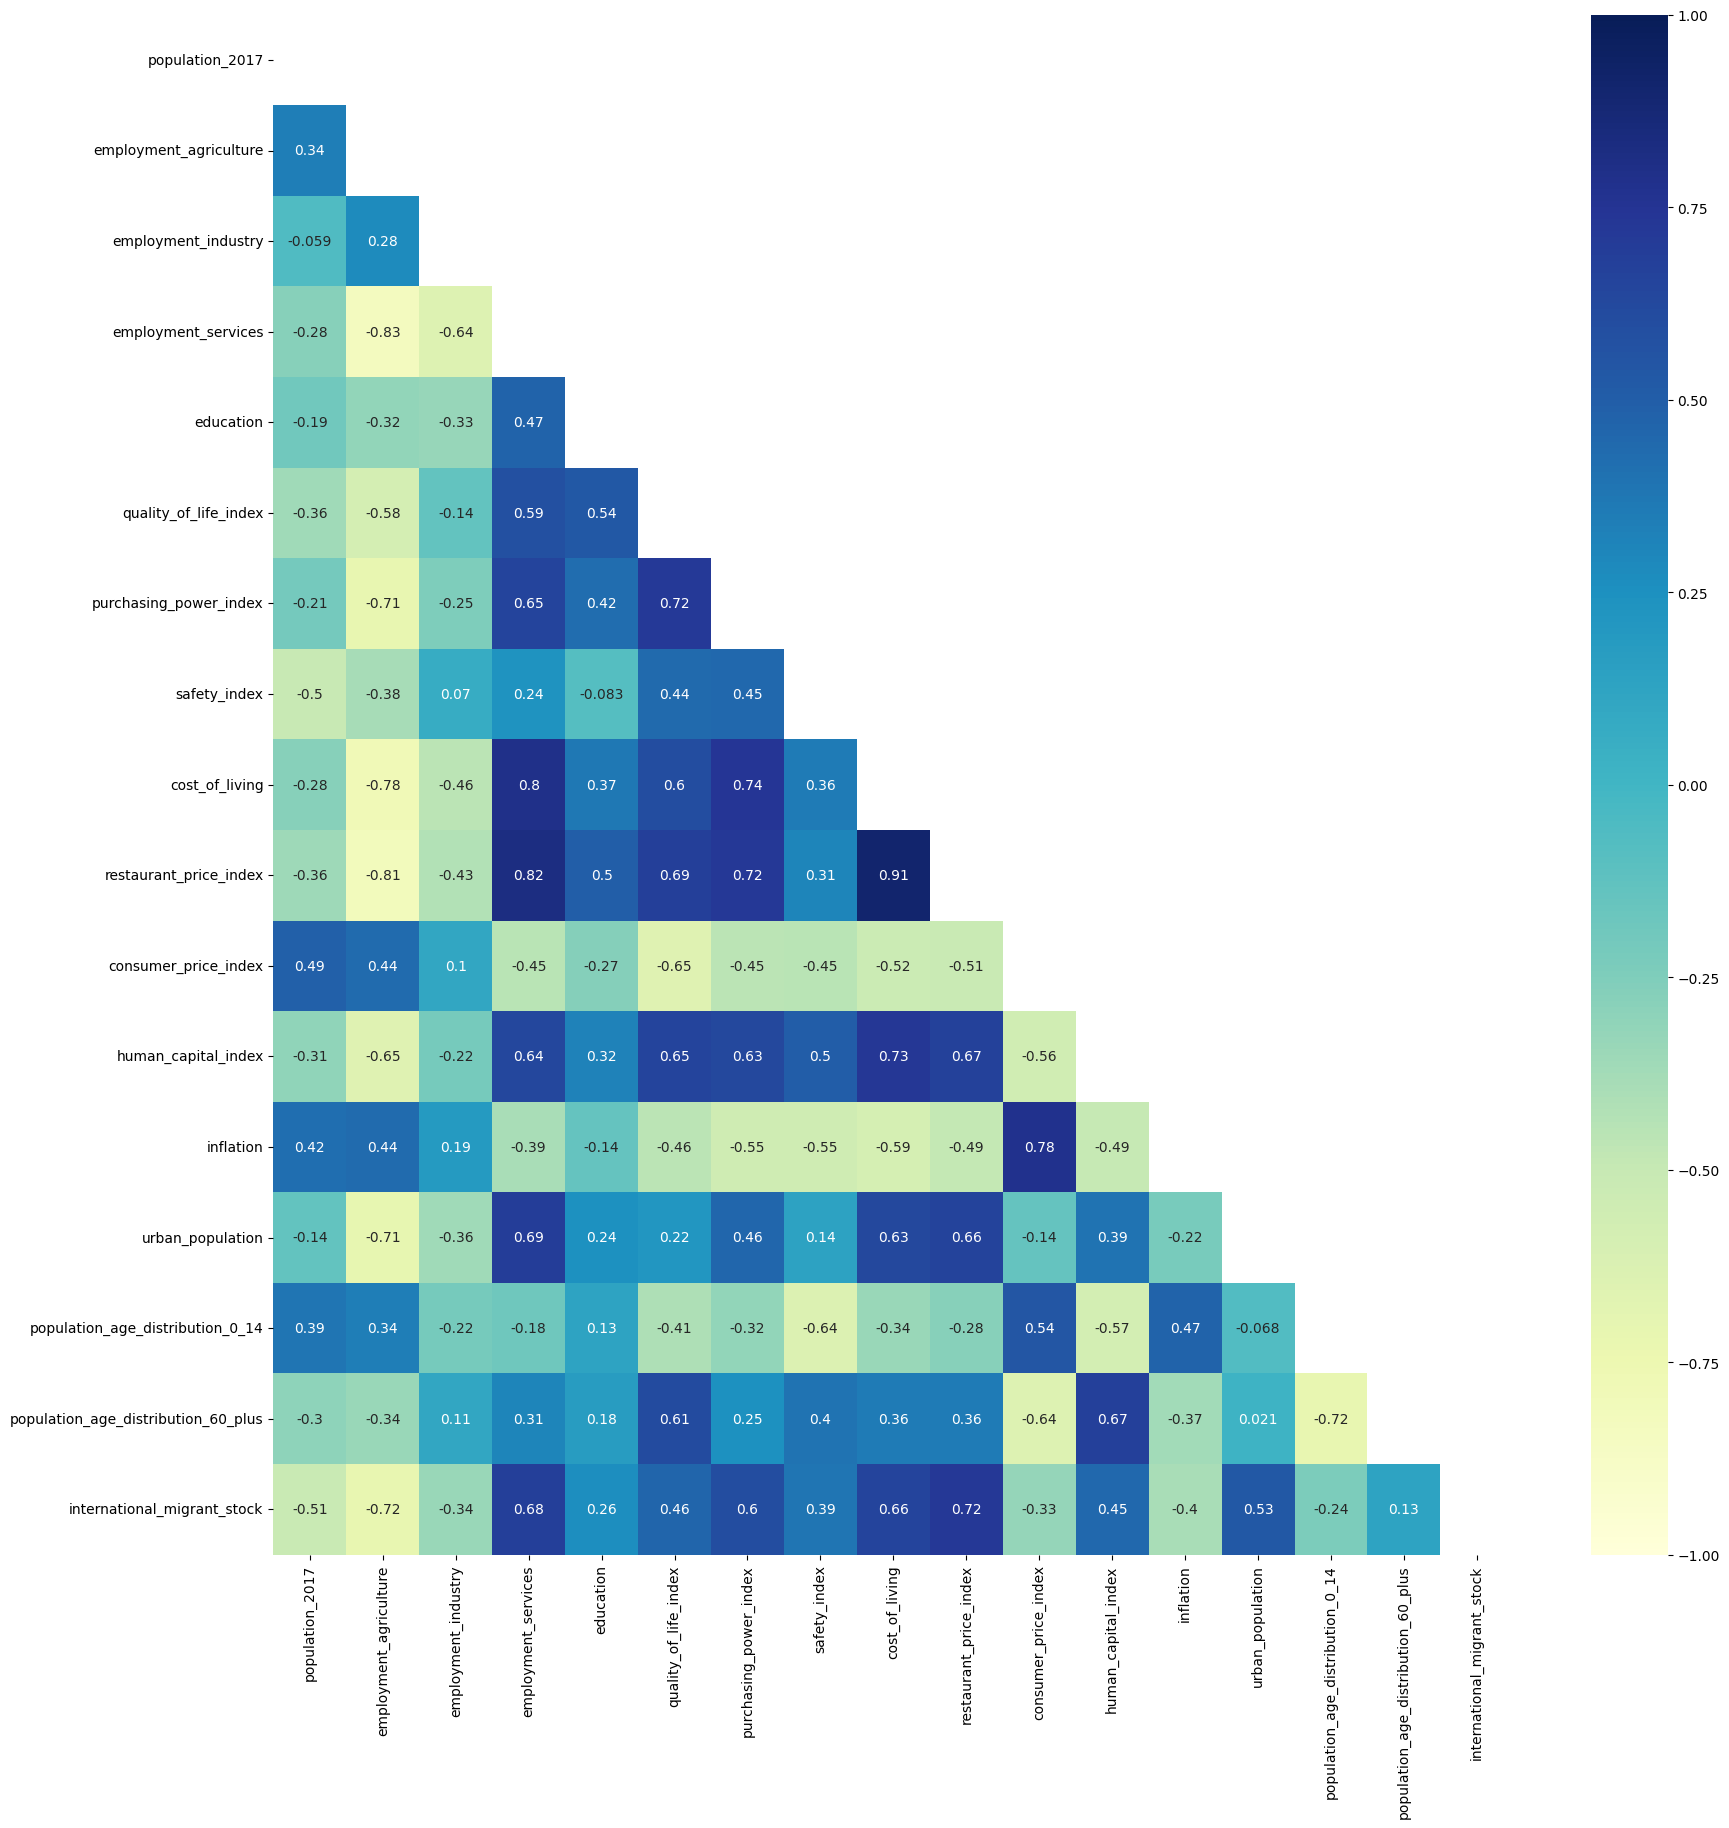

In [19]:
# tras eliminar las columnas volvemos a sacar las variables numéricas, la correlación y el heatmap
df_country_num = df_country.select_dtypes(include=np.number)
correl2 = df_country_num.corr(method='spearman')
mask = np.triu(np.ones_like(correl2, dtype = np.bool_))
sns.heatmap(correl2, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

### 9. Distribución de la variable respuesta y las variables predictoras numéricas

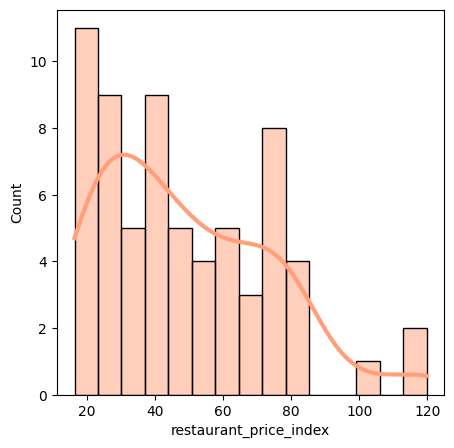

In [20]:
# Distribución de la variable respuesta
plt.figure(figsize = (5, 5))
sns.histplot(x='restaurant_price_index', data=df_country, kde=True, line_kws={'linewidth': 3}, color='lightsalmon', alpha = 0.5, bins=15)
plt.show();

Como vemos la variable respuesta no parece tener una distribución normal, pero entraremos a evaluar esto con más en detalle más adelante.

In [21]:
# quitamos la variable respuesta de las numéricas para evaluarlas separadas
df_country_num = df_country_num.drop(columns="restaurant_price_index")

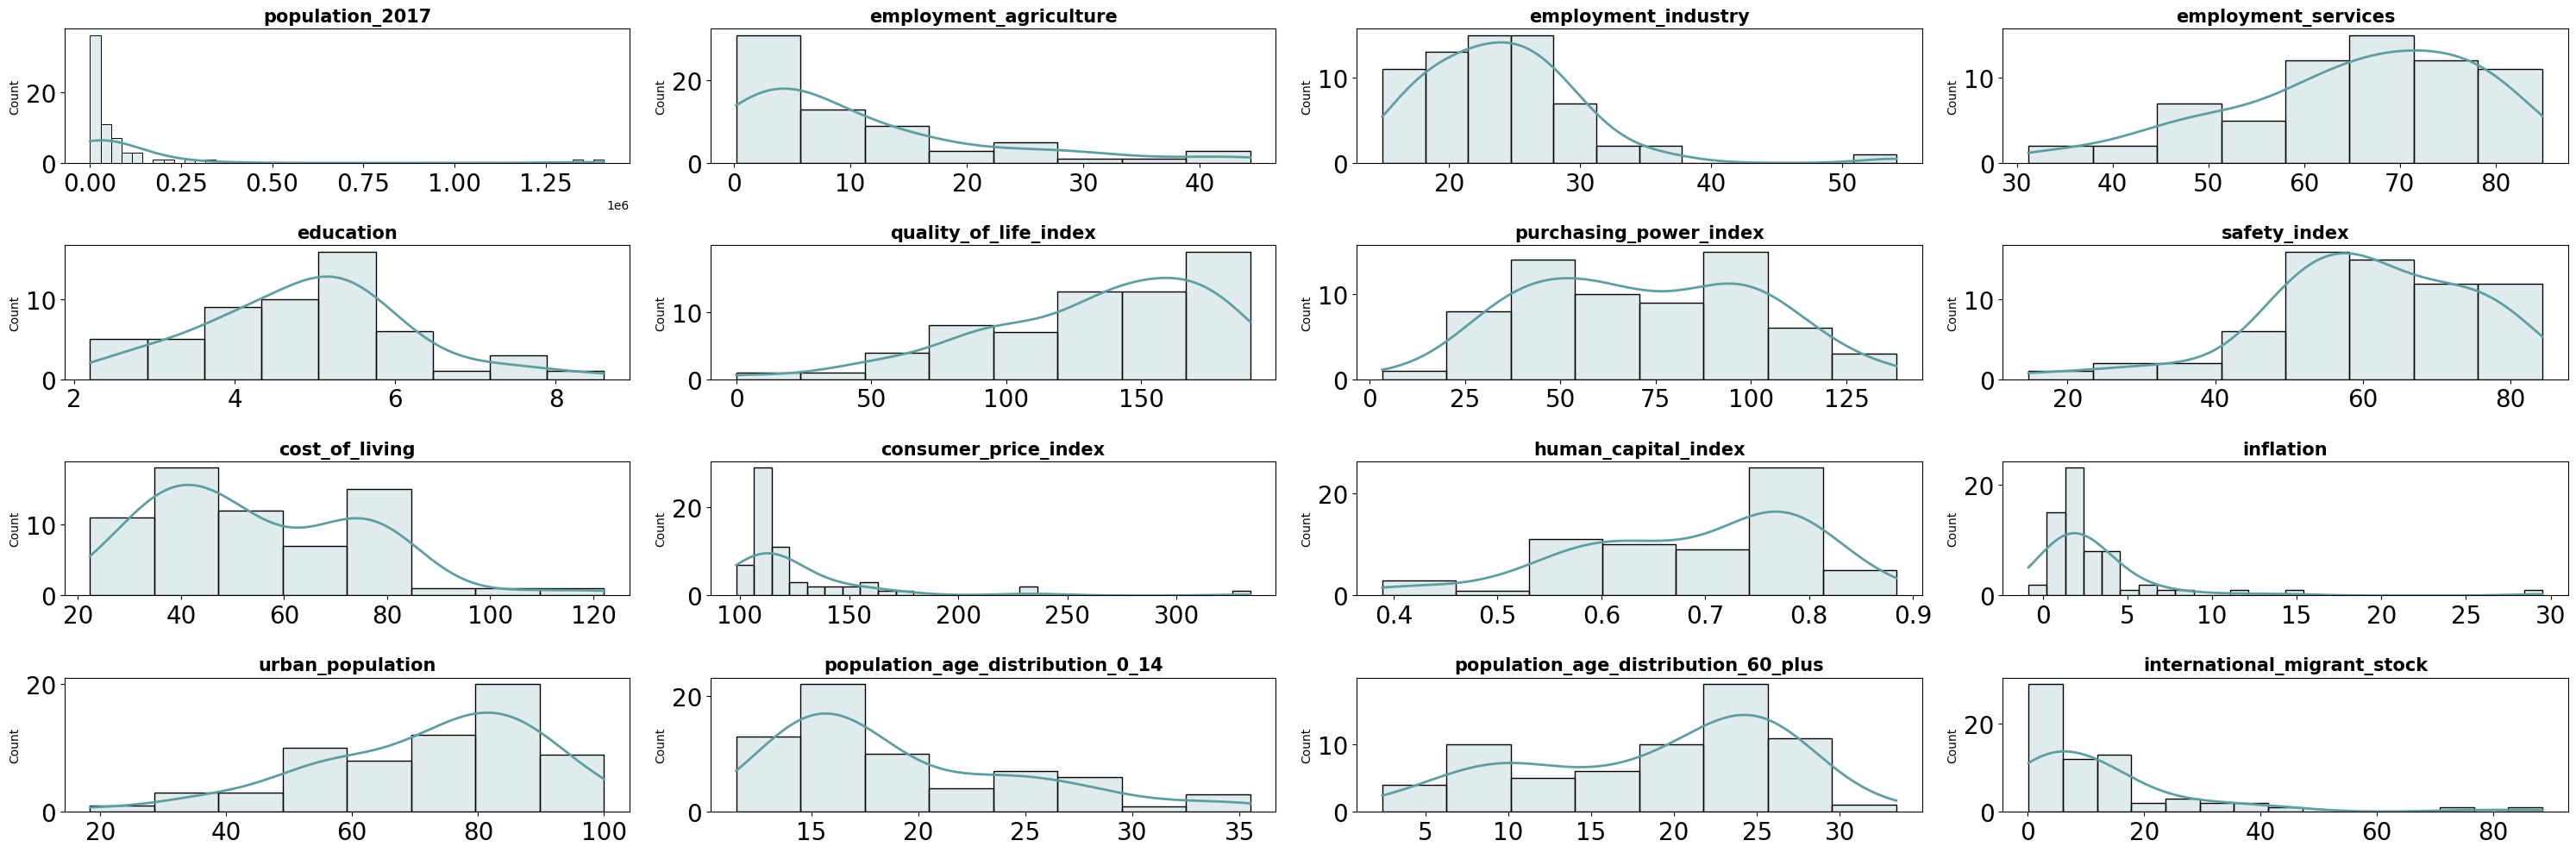

In [22]:
# Distribución de las predictoras numéricas
fig, axes = plt.subplots(4,4 , figsize = (30, 10))

columnas_num = df_country_num.columns
axes = axes.flat

for i, colum in enumerate(columnas_num): 
    sns.histplot(
        data = df_country_num,
        x = colum,
        kde = True,
        color = "cadetblue",  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

Como vemos en los histogramas la distribución de las variables numéricas varía mucho de unas a otras. En concreto podemos suponer que algunas de ellas como `population_2017`, `education` , `consumer_price_index`, `inflation` e `interntional_migrant_stock` tendrán outliers, algo que confirmaremos más adelante con los boxplots.

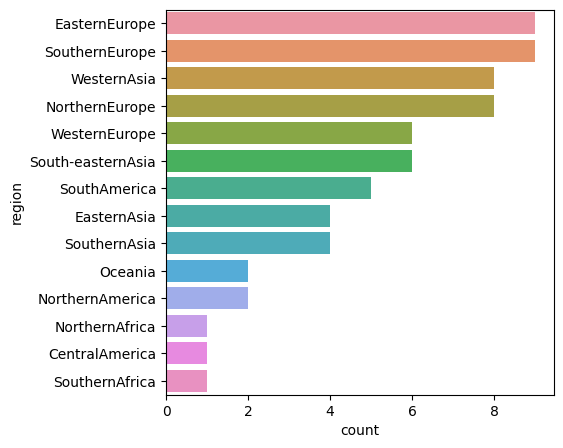

In [23]:
# sacamos la distribución (conteo de cada categoría) de la variable categórica
plt.figure(figsize = (5, 5))
sns.countplot(y=df_country['region'], data=df_country, order=df_country['region'].value_counts().index)
plt.show();

Observamos que las regiones de `EasterEurope` y `SuthernEurope` son las más frecuentes, con 9 datos cada una, mientras que las de `NorthernAmerica`, `CentralAmerica` y `SouthernAfrica` son las menos frecuentes con 1 dato por categoría.

### 10. Relación entre variables predictoras y la variable a predecir 

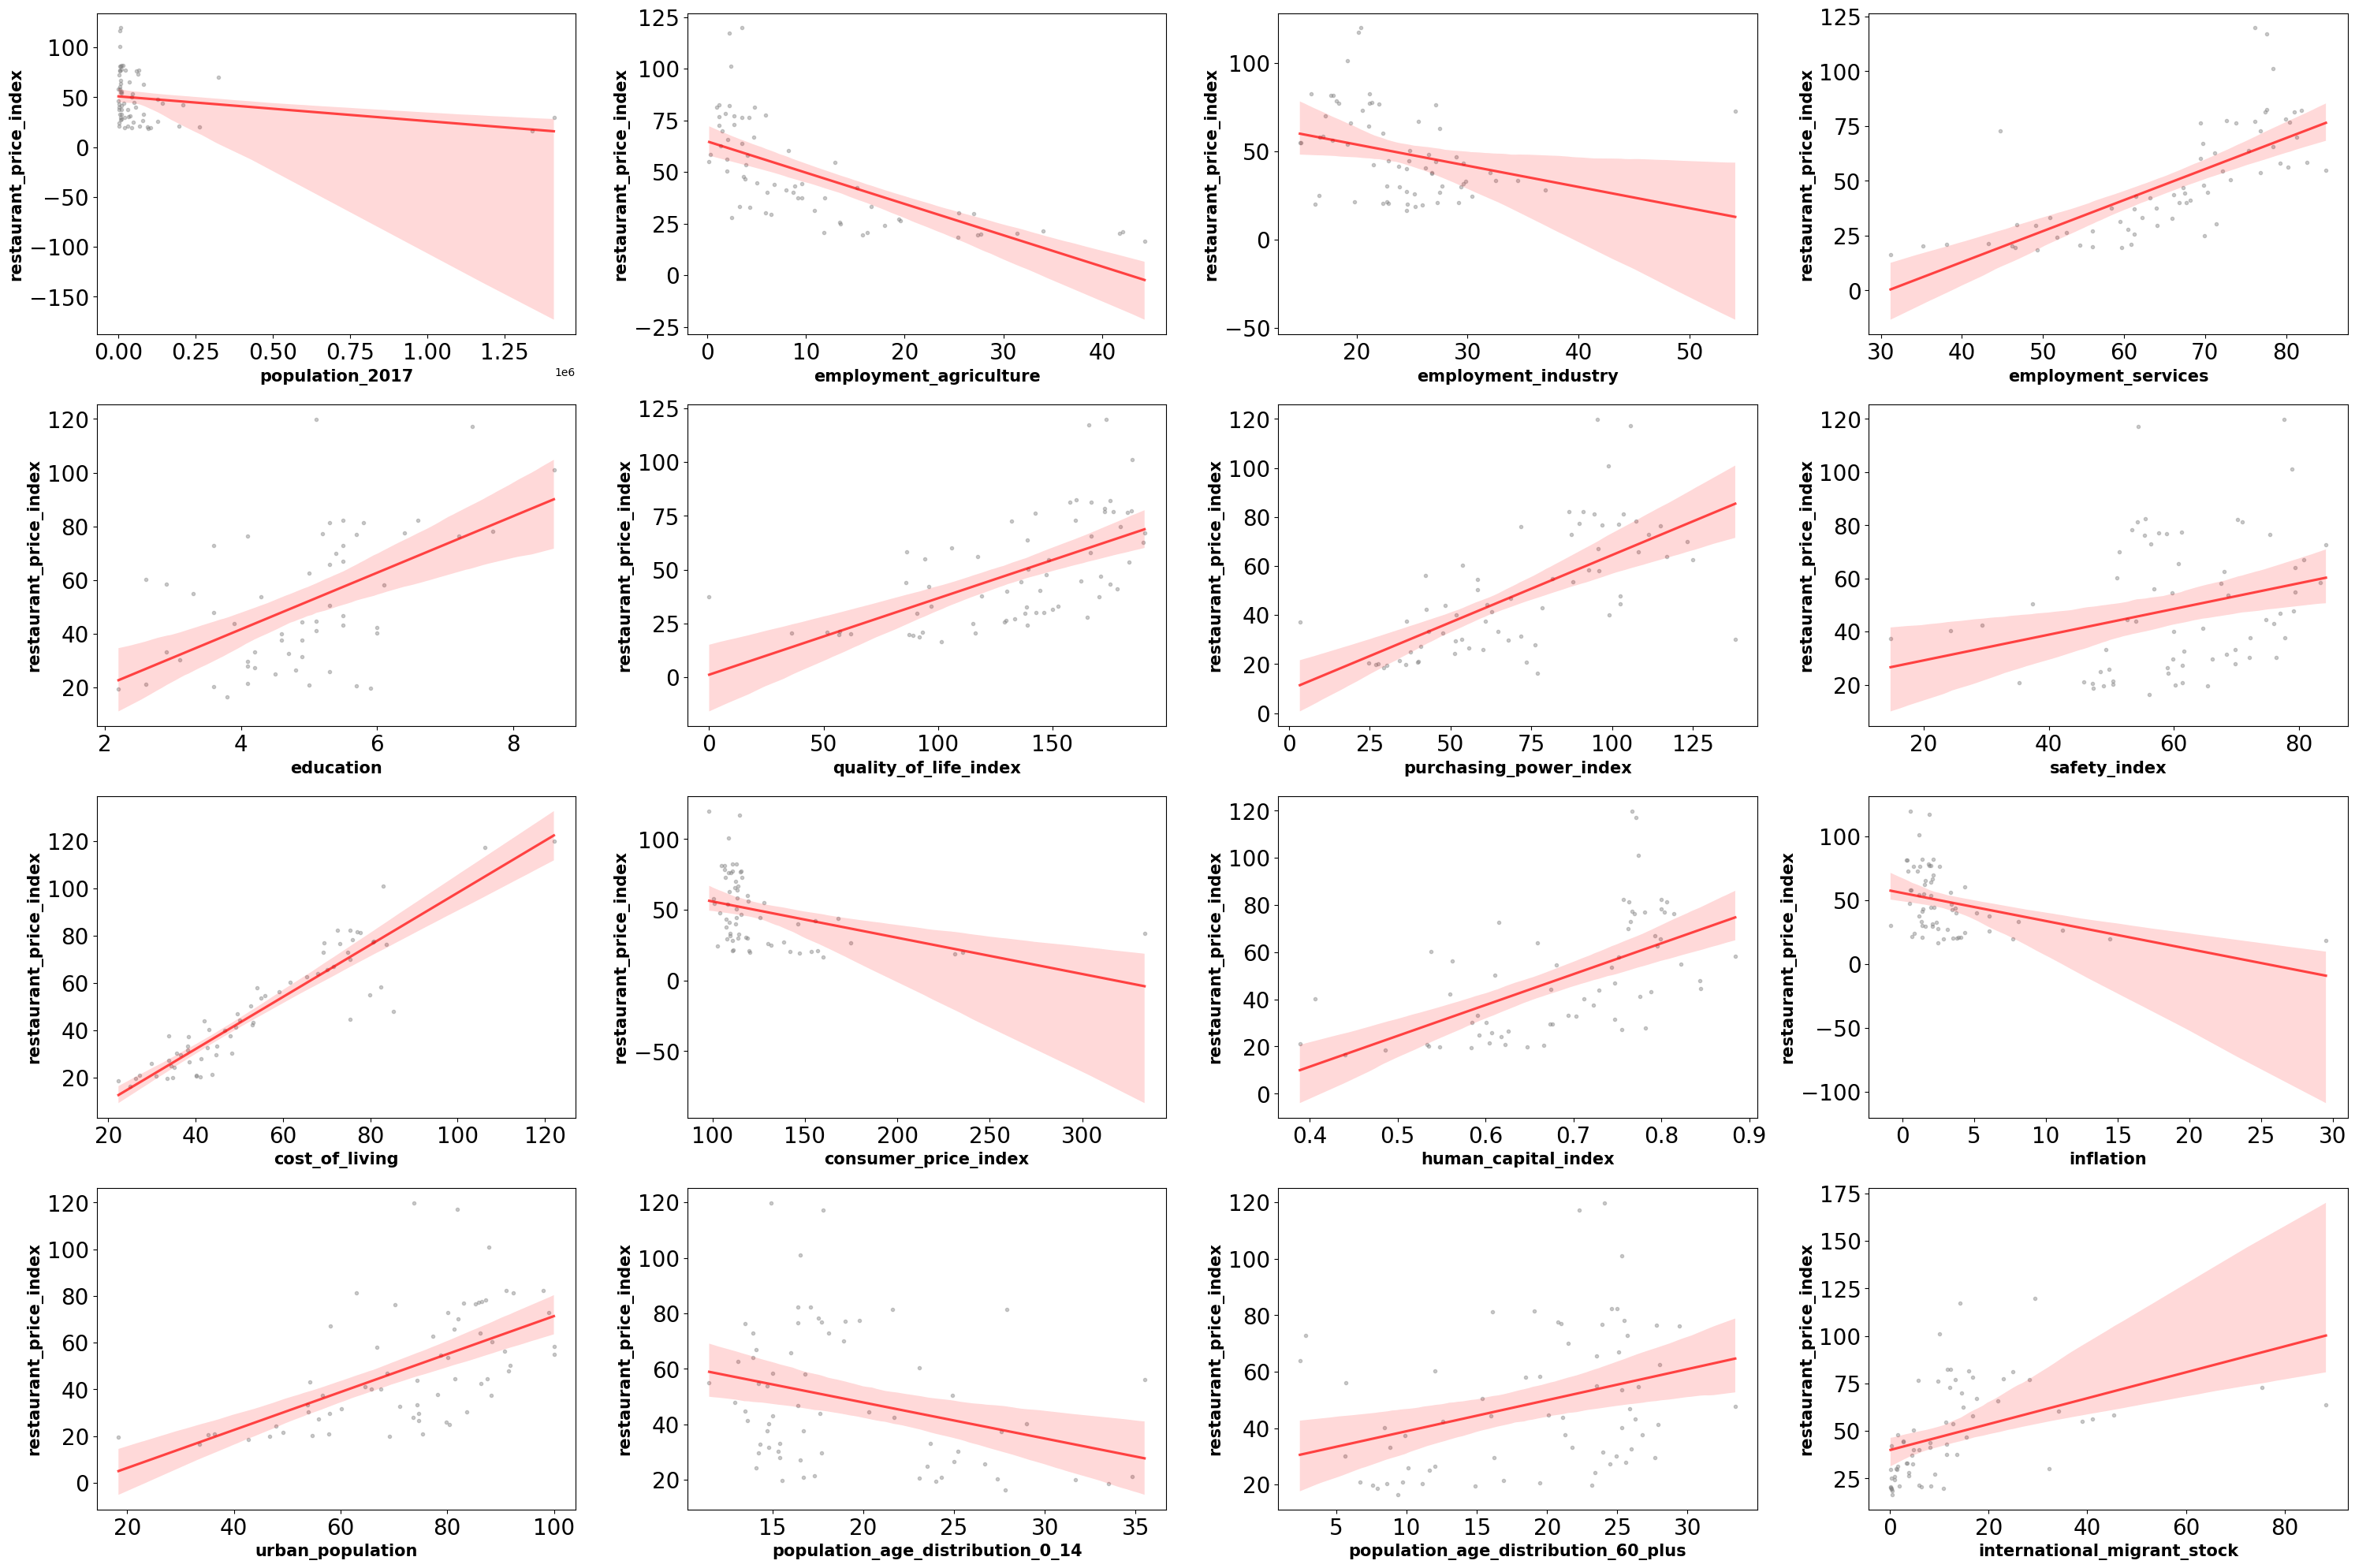

In [24]:
# ploteamos los regplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 20))
axes = axes.flat

for i, colum in enumerate(df_country_num):
    sns.regplot(
        x = df_country[colum], 
        y = df_country["restaurant_price_index"], 
        marker= ".",
        scatter_kws = {'color': "gray", "alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },  
        ax = axes[i])
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(xlabel= colum, fontsize = 15, fontweight = "bold")
    axes[i].set_ylabel(ylabel = "restaurant_price_index", fontsize = 15, fontweight = "bold")
    
fig.tight_layout();

Podemos ver que en algunas variables como `education` o `population_2017` no parece que haya una relación con la variable respuesta y además la mayor parte de nuestros datos están en un extremo de la gráfica.
  
Sin embargo, en otras como `cost_of_living` o `quality_of_life_index` sí que parece haber una relación directa con la variable respuesta, cuando estas suben la variable respuesta también sube.

En otras como `emploiment_agriculture` se ve una relación inversa con la variable respuesta, cuanto mayor % de población en el sector de la agricultura menor es el precio de los restaurantes. 

### 11. Gestión de nulos

Aunque tengamos muy pocos nulos (entre 2-6 por columna) tenemos que realizar su gestión, teniendo en cuenta además que para ser tan pocos en términos absolutos no son tan pocos en porcentaje, ya que tan solo tenemos 66 filas. Es por ello que hemos decidido gestionarlos utilizando el Iterative Imputer, en lugar de sustituirlos por la mediana o la moda, lo que podría desvirtuar los estadísticos en un dataset con tan pocos registros. 

In [25]:
# recordamos los valore nulos que tenemos (en %)
df_country.isnull().sum()*100/df_country.shape[0] 

region                                  0.000000
population_2017                         0.000000
employment_agriculture                  0.000000
employment_industry                     0.000000
employment_services                     0.000000
education                              15.151515
quality_of_life_index                   0.000000
purchasing_power_index                  0.000000
safety_index                            0.000000
cost_of_living                          0.000000
restaurant_price_index                  0.000000
consumer_price_index                    3.030303
human_capital_index                     3.030303
inflation                               3.030303
urban_population                        0.000000
population_age_distribution_0_14        0.000000
population_age_distribution_60_plus     0.000000
international_migrant_stock             0.000000
dtype: float64

In [26]:
# creamos una instancia del método Iterative Imputer
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

In [27]:
# lo aplicamos sobre nuestras variables numéricas
imputer.fit(df_country_num)

IterativeImputer()

In [28]:
# transformamos los datos
imputer.transform(df_country_num)

array([[4.4271e+04, 2.0000e+00, 2.4800e+01, ..., 2.4900e+01, 1.5400e+01,
        4.8000e+00],
       [2.4451e+04, 2.7000e+00, 2.1200e+01, ..., 1.9000e+01, 2.1000e+01,
        2.8200e+01],
       [8.7360e+03, 4.7000e+00, 2.5600e+01, ..., 1.4100e+01, 2.5100e+01,
        1.7500e+01],
       ...,
       [3.2446e+05, 1.5000e+00, 1.7200e+01, ..., 1.8900e+01, 2.1500e+01,
        1.4500e+01],
       [3.1977e+04, 1.1900e+01, 2.6800e+01, ..., 2.7600e+01, 9.9000e+00,
        4.5000e+00],
       [9.5541e+04, 4.1800e+01, 2.2900e+01, ..., 2.3100e+01, 1.1100e+01,
        1.0000e-01]])

In [29]:
# convertimos el array que nos devuelve en un dataframe, usando la lista de paises como índice para que encaje con el dataframe original. 
numericas_trans = pd.DataFrame(imputer.transform(df_country_num), columns = df_country_num.columns, index=spv.paises_indice)

In [30]:
#comprobamos que no quedan nulos
numericas_trans.isnull().sum()

population_2017                        0
employment_agriculture                 0
employment_industry                    0
employment_services                    0
education                              0
quality_of_life_index                  0
purchasing_power_index                 0
safety_index                           0
cost_of_living                         0
consumer_price_index                   0
human_capital_index                    0
inflation                              0
urban_population                       0
population_age_distribution_0_14       0
population_age_distribution_60_plus    0
international_migrant_stock            0
dtype: int64

In [31]:
# sacamos el nombre de las columnas del dataframe sin nulos
columnas = numericas_trans.columns
# eliminamos esas columnas de nuestro dataframe
df_country.drop(columnas, axis = 1, inplace = True)
# creamos nuevas columnas en nuestro dataframe original basándonos en el dataframe de las numericas_trans
df_country[columnas] = numericas_trans[columnas]

In [32]:
# comprobamos que todo sigue en orden
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Argentina to Vietnam
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region                               66 non-null     object 
 1   restaurant_price_index               66 non-null     float64
 2   population_2017                      66 non-null     float64
 3   employment_agriculture               66 non-null     float64
 4   employment_industry                  66 non-null     float64
 5   employment_services                  66 non-null     float64
 6   education                            66 non-null     float64
 7   quality_of_life_index                66 non-null     float64
 8   purchasing_power_index               66 non-null     float64
 9   safety_index                         66 non-null     float64
 10  cost_of_living                       66 non-null     float64
 11  consumer_price_index      

### 12. Detección y gestión de outliers

Aunque ya en los histogramas se podía apreciar la presencia de algunos outliers vamos a generar los boxplots para las columnas numéricas para verlos más en detalle

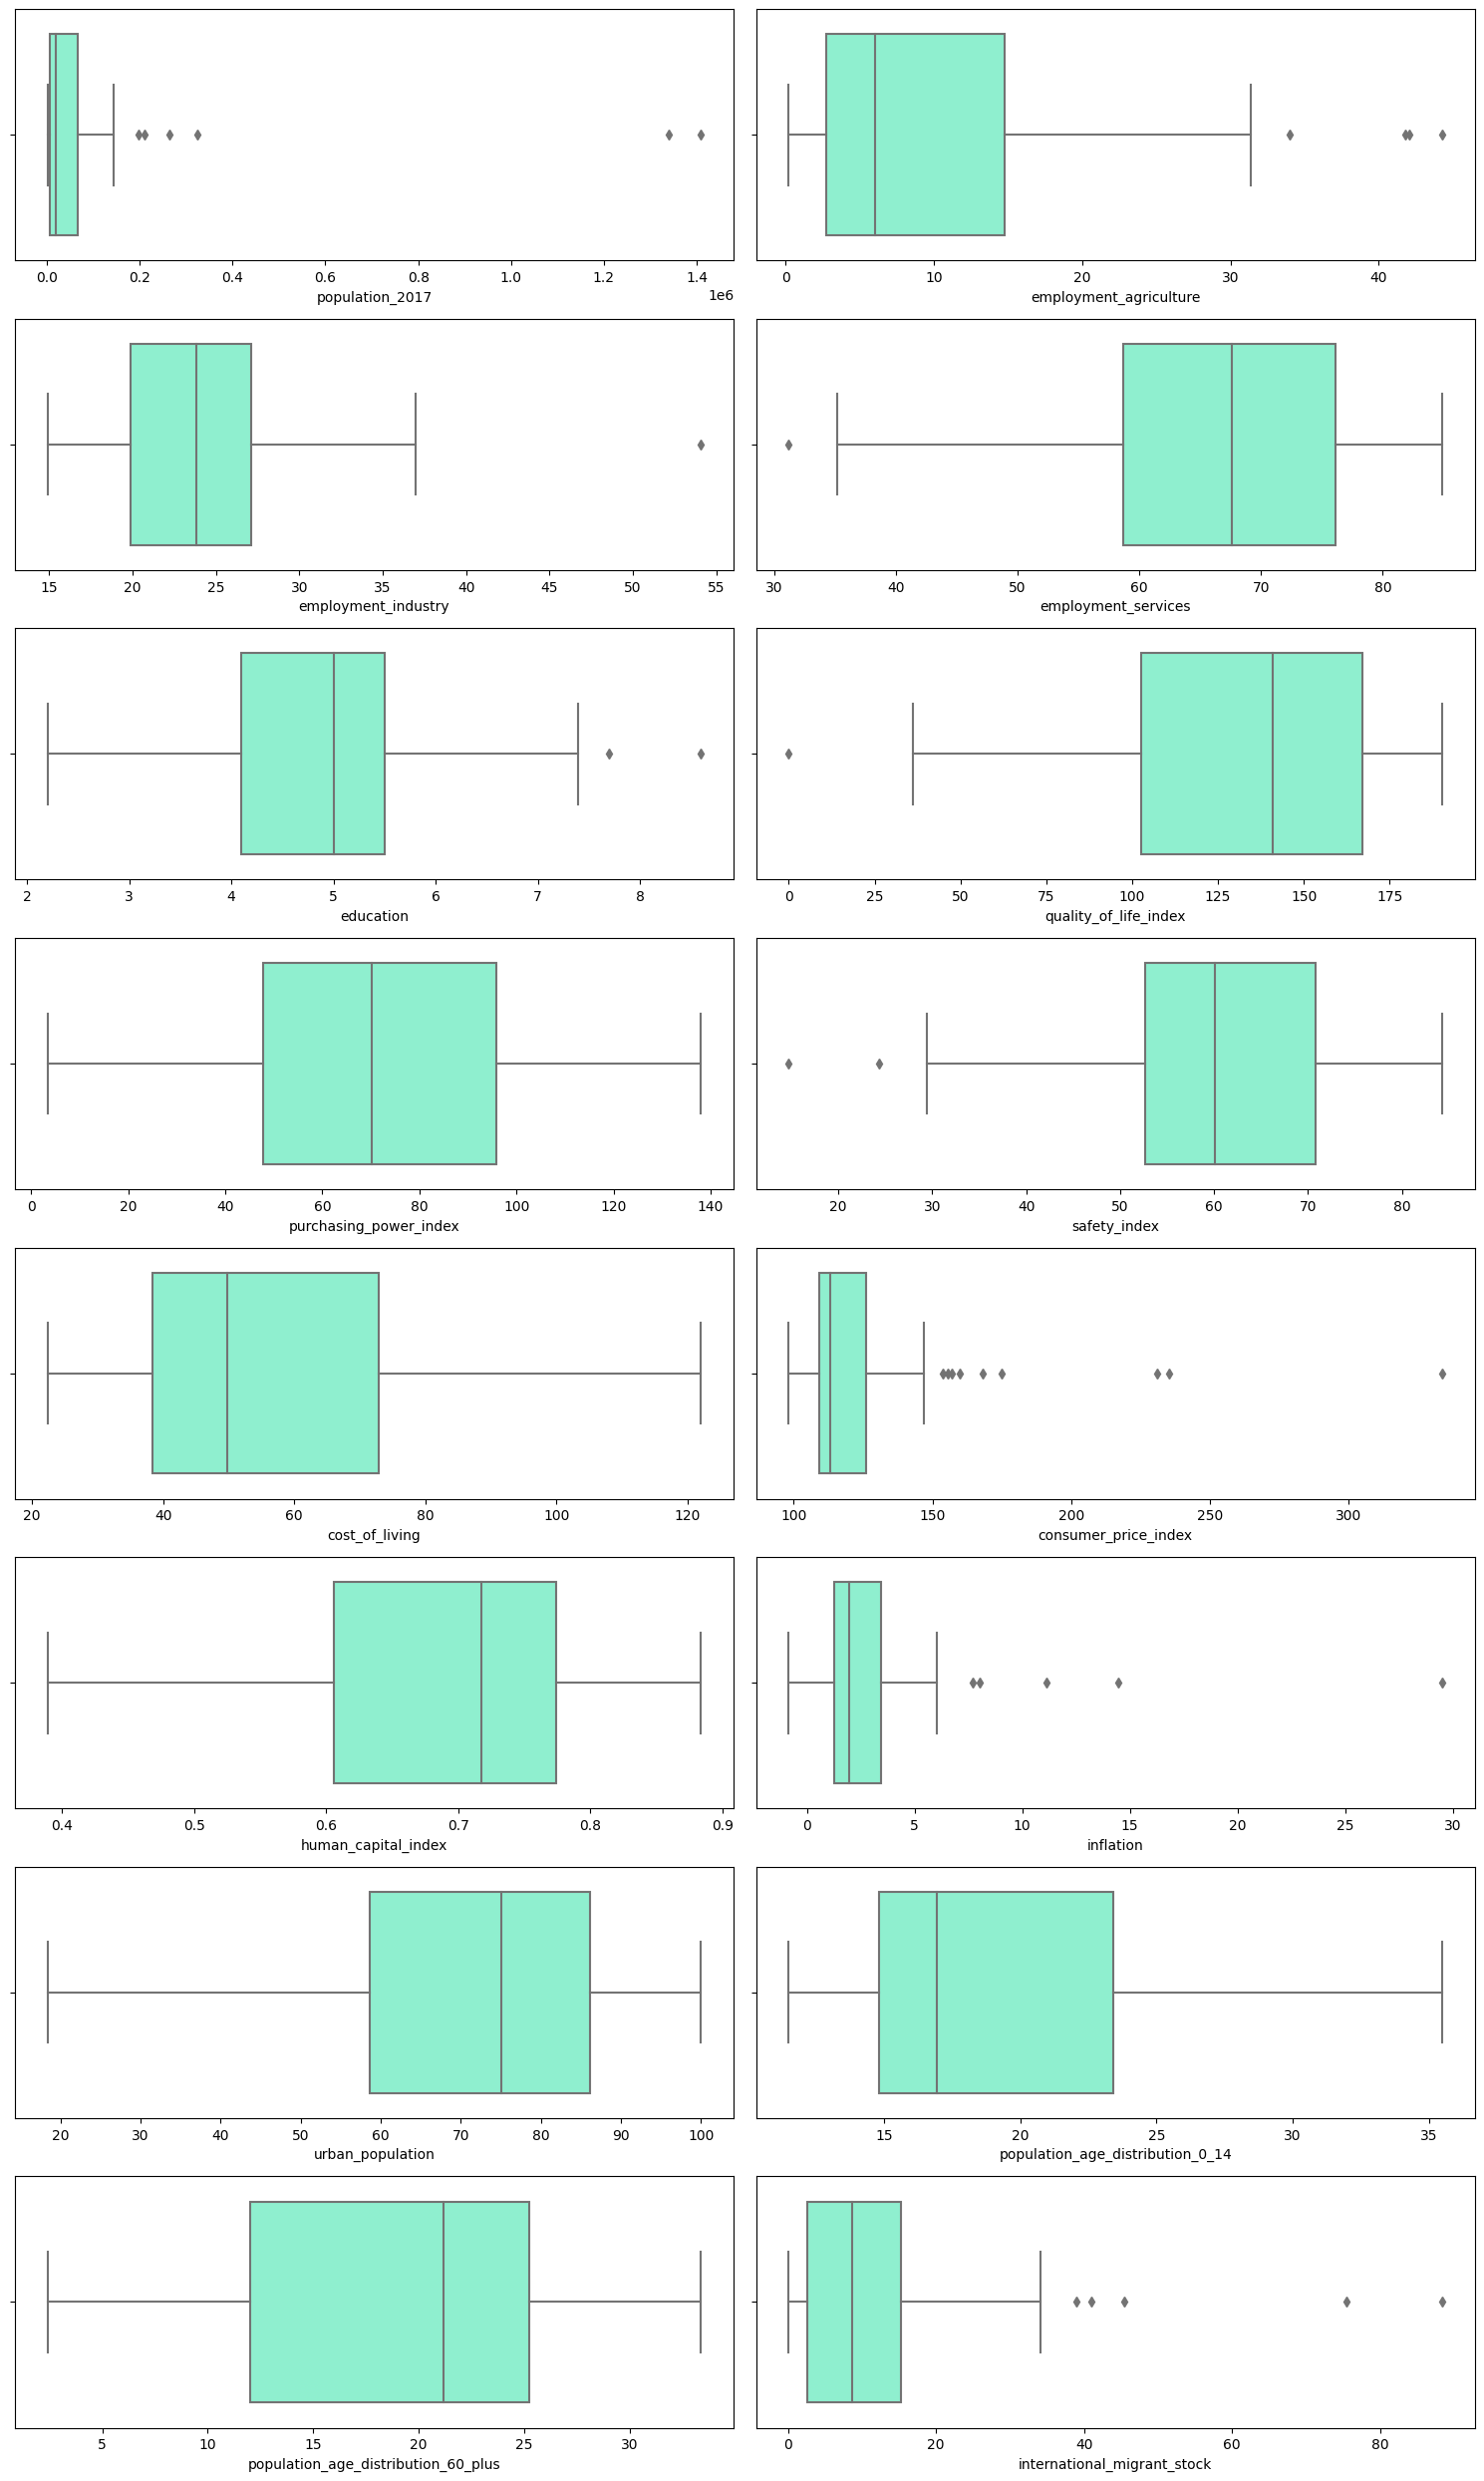

In [33]:
fig, axes = plt.subplots(8, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(df_country_num.columns):
    sns.boxplot(x = df_country_num[columna], data = df_country_num, ax=axes[indice], color = "aquamarine"); 
    
plt.tight_layout()
plt.show()

In [34]:
# detectamos cuales son nuestros outliers
df_outliers, indices_outliers = spf.detectar_outliers(df_country_num.columns, df_country)

In [35]:
# vemos los índices de los outliers para cada columna
indices_outliers

{'population_2017': ['Brazil',
  'China',
  'India',
  'Indonesia',
  'Pakistan',
  'United States of America'],
 'employment_agriculture': ['India', 'Pakistan', 'Thailand', 'Vietnam'],
 'employment_industry': ['Qatar'],
 'employment_services': ['India'],
 'education': ['Denmark', 'Sweden'],
 'quality_of_life_index': ['Venezuela (Bolivarian Republic of)'],
 'safety_index': ['South Africa', 'Venezuela (Bolivarian Republic of)'],
 'consumer_price_index': ['Egypt',
  'Iran (Islamic Republic of)',
  'Russian Federation',
  'Turkey',
  'Ukraine',
  'Venezuela (Bolivarian Republic of)'],
 'inflation': ['Egypt',
  'Iran (Islamic Republic of)',
  'Sri Lanka',
  'Turkey',
  'Ukraine',
  'Venezuela (Bolivarian Republic of)'],
 'international_migrant_stock': ['China, Hong Kong SAR',
  'Jordan',
  'Qatar',
  'Singapore',
  'United Arab Emirates']}

In [36]:
# vemos que el dataframe con los outliers tiene duplicados
df_outliers.duplicated().sum()

11

In [37]:
# eliminamos los duplicados
df_outliers.drop_duplicates(inplace = True)
# sacamos el dataframe con los outliers para explorarlos
df_outliers

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Brazil,SouthAmerica,42.33,209288.0,15.2,21.5,63.2,6.000000,96.15,42.38,29.38,53.07,155.668786,0.560000,3.446373,86.309,21.7,12.6,0.3
China,EasternAsia,29.68,1409517.0,27.0,23.9,49.1,3.541579,90.95,67.84,66.10,44.76,119.088052,0.673000,1.593137,57.960,17.7,16.2,0.1
India,SouthernAsia,16.38,1339180.0,44.3,24.5,31.2,3.800000,101.52,76.73,56.04,25.08,159.829465,0.440000,2.490887,33.600,27.8,9.4,0.4
Indonesia,South-easternAsia,20.29,263991.0,31.4,22.4,46.2,3.600000,62.02,27.61,50.32,41.11,142.182412,0.535000,3.808798,54.659,27.4,8.6,0.1
Pakistan,SouthernAsia,21.01,197016.0,42.1,19.8,38.1,2.600000,93.41,39.95,45.62,27.18,156.911346,0.389000,4.085374,36.442,34.8,6.7,1.9
United States of America,NorthernAmerica,70.02,324460.0,1.5,17.2,81.3,5.400000,179.73,123.17,51.24,75.42,112.411557,0.762000,2.130110,82.058,18.9,21.5,14.5
Thailand,South-easternAsia,21.42,69038.0,34.0,22.7,43.3,4.100000,57.21,34.28,50.22,43.71,111.286809,0.604000,0.665632,49.200,17.3,16.9,5.8
Vietnam,South-easternAsia,20.46,95541.0,41.8,22.9,35.2,5.700000,36.12,24.77,47.04,40.11,153.631652,0.666000,3.520257,35.213,23.1,11.1,0.1
Qatar,WesternAsia,72.73,2639.0,1.2,54.1,44.7,3.600000,132.37,111.28,84.30,69.20,115.858803,0.615000,0.394879,99.078,13.9,2.8,75.5


Como vemos tanto a nivel gráfico como analítico tenemos bastantes outliers en muchas de nuestras columnas, en los siguientes índices:   
- `population_2017`: 6, 11, 24, 25, 39, 63.  
- `employment_agriculture`: 24, 39, 57, 65.  
- `employment_industry`: 43.  
- `employment_services`: 24.  
- `education`: 5, 11, 17, 31, 40, 47, 61, 64.  
- `quality_of_life_index`: 64.  
- `safety_index`: 52, 64.  
- `consumer_price_index`: 17, 26, 46, 59, 60, 64.  
- `inflation`: 17, 26, 54, 59, 60, 64.  
- `international_migrant_stock`: 10, 31, 43, 49, 61.  

Teniendo en cuenta que tenemos tan solo 66 registros es un número considerable de outlier. Además, tiene sentido que haya outliers ya que estamos analizando países muy diferentes entre sí, con diferentes niveles de desarrollo, costumbres, estructuras sociales, etc. por lo que las variables pueden tener bastante dispersión en los datos. Por ello decidimos tratarlos más adelante mediante el RobustScaler.

### 13. Descripción de las columnas tras el pretratado

A continuación se indica como quedan las columnas seleccionadas y tratadas:
- `country (índice)`: País analizado. Hay un registro por país (object)   
- `region`: Región del mundo en la que se encuentra el país (object)  
- `restaurant_price_index (variable respuesta)`: Índice de los precios de los restaurantes del país (float)   
- `population_2017`: Population in 2017 in thousands (integer)    
- `employment_agriculture`: % de población empleada en el sector de la agricultua (float)   
- `employment_industry`: % de población empleada en el sector de la industria (float)   
- `employment_services`: % de población empleada en el sector servicios (float)  
- `education`: % del producto interior bruto (DGP) que gasta el gobierno en educación (object)   
- `quality_of_life_index`: índice de la calidad de vida de la población (float)   
- `purchasing_power_index`: índice del poder adquisitivo de la población (float)   
- `safety_index`: Índice de la seguridad del país (float)   
- `cost_of_living`: Coste de la vida (float)   
- `consumer_price_index`: Índice de precios al consumidor, 2010 = 100 (float)   
- `human_capital_index`: índice de capital humano (HCI) en una escala entre 0 y 1 (float)   
- `inflation`: % de inflación anual de los precios del consumidor (float)   
- `urban_population`: % de la población total que reside en zonas urbanas (float)   
- `population_age_distribution_0_14`: distribución de la población por edades. Indica el % de población entre 0 y 14 años (float)  
- `population_age_distribution_60_plus`: distribución de la población por edades. Indica el % de población de más de 60 años (float)  
- `international_migrant_stock`: cantidad de migrantes internacionales en % respecto a la población total (float) 

### 14. Guardado del dataframe con las variables seleccionadas y tratado

In [38]:
df_country.to_csv('datos/soci_econ_country_profiles_resumido.csv')